In [7]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import ListedColormap

from tabicl.prior.prior_config import DEFAULT_FIXED_HP, DEFAULT_SAMPLED_HP
from tabicl.prior.dataset import PriorDataset
from tabicl.prior.graph import marginalize_nodes, marginalize_nodes_array, marginalize_2hop_iterative

from gtdl.utils import print_params, imshow
from gtdl.viz.graph import get_graph, draw_scms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate

In [8]:
scm_fixed_hp = {
    **DEFAULT_FIXED_HP,
    'is_causal': True,
}
scm_sampled_hp = {k: v for k, v in DEFAULT_SAMPLED_HP.items() if k not in scm_fixed_hp}

min_features = 5
dataset = PriorDataset(
    batch_size = 18,
    min_features = min_features,
    max_features = min_features,
#     max_classes = 3,
    batch_size_per_gp = 1, # slows dows, but for visualization it's ok
    scm_fixed_hp=scm_fixed_hp,
    scm_sampled_hp=scm_sampled_hp,
)

In [9]:
xs, ys, ds, seq_lens, train_sizes, priors = dataset.prior.get_batch()
xs.shape, ys.shape, ds.shape, seq_lens.shape, train_sizes.shape, len(priors)

(torch.Size([18, 1024, 5]),
 torch.Size([18, 1024]),
 torch.Size([18]),
 torch.Size([18]),
 torch.Size([18]),
 18)

In [10]:
adjs, graphs = [], []

for prior in priors:

    adj = prior.adj.numpy()
    adj = (np.abs(adj) > 0.)
    indices = (idxs_x, idxs_y) = [idx_i.numpy() for idx_i in prior.indices]
    width_layers = np.concatenate([[prior.num_causes], [prior.hidden_dim] * prior.num_layers])

    graph = get_graph(adj, width_layers, idxs_x, idxs_y)

    graphs.append(graph)
    adjs.append(adj)

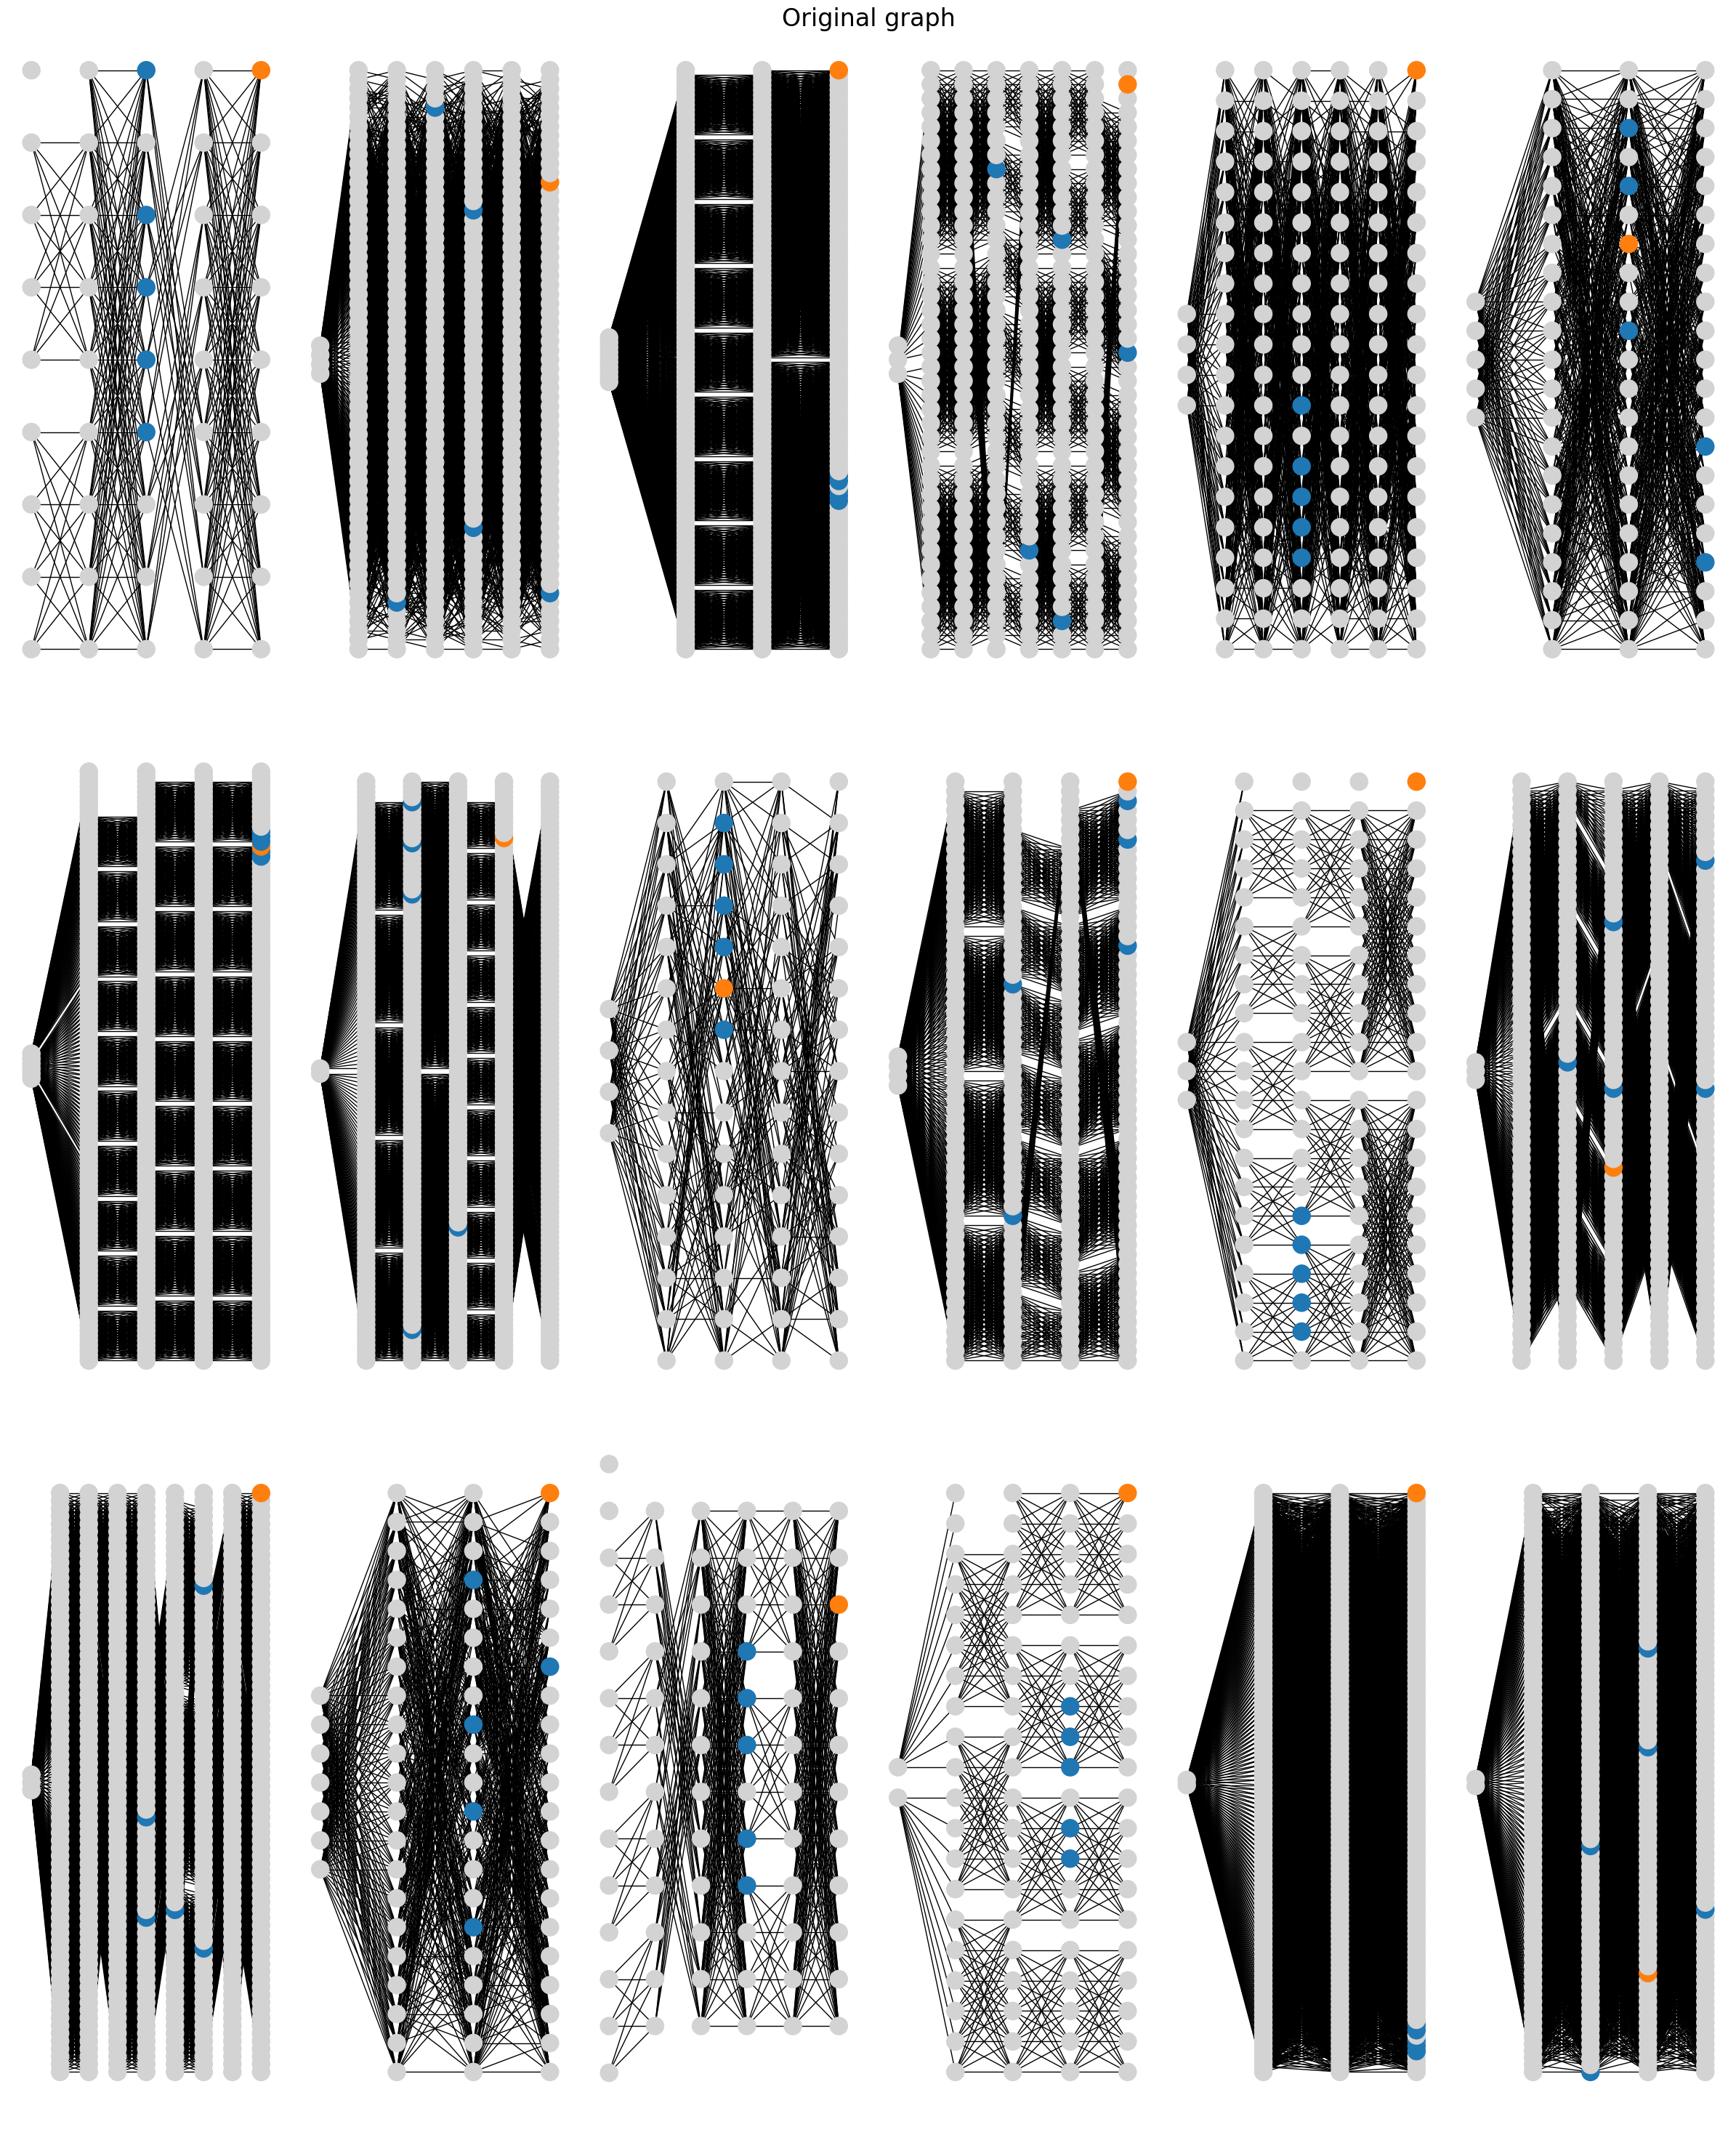

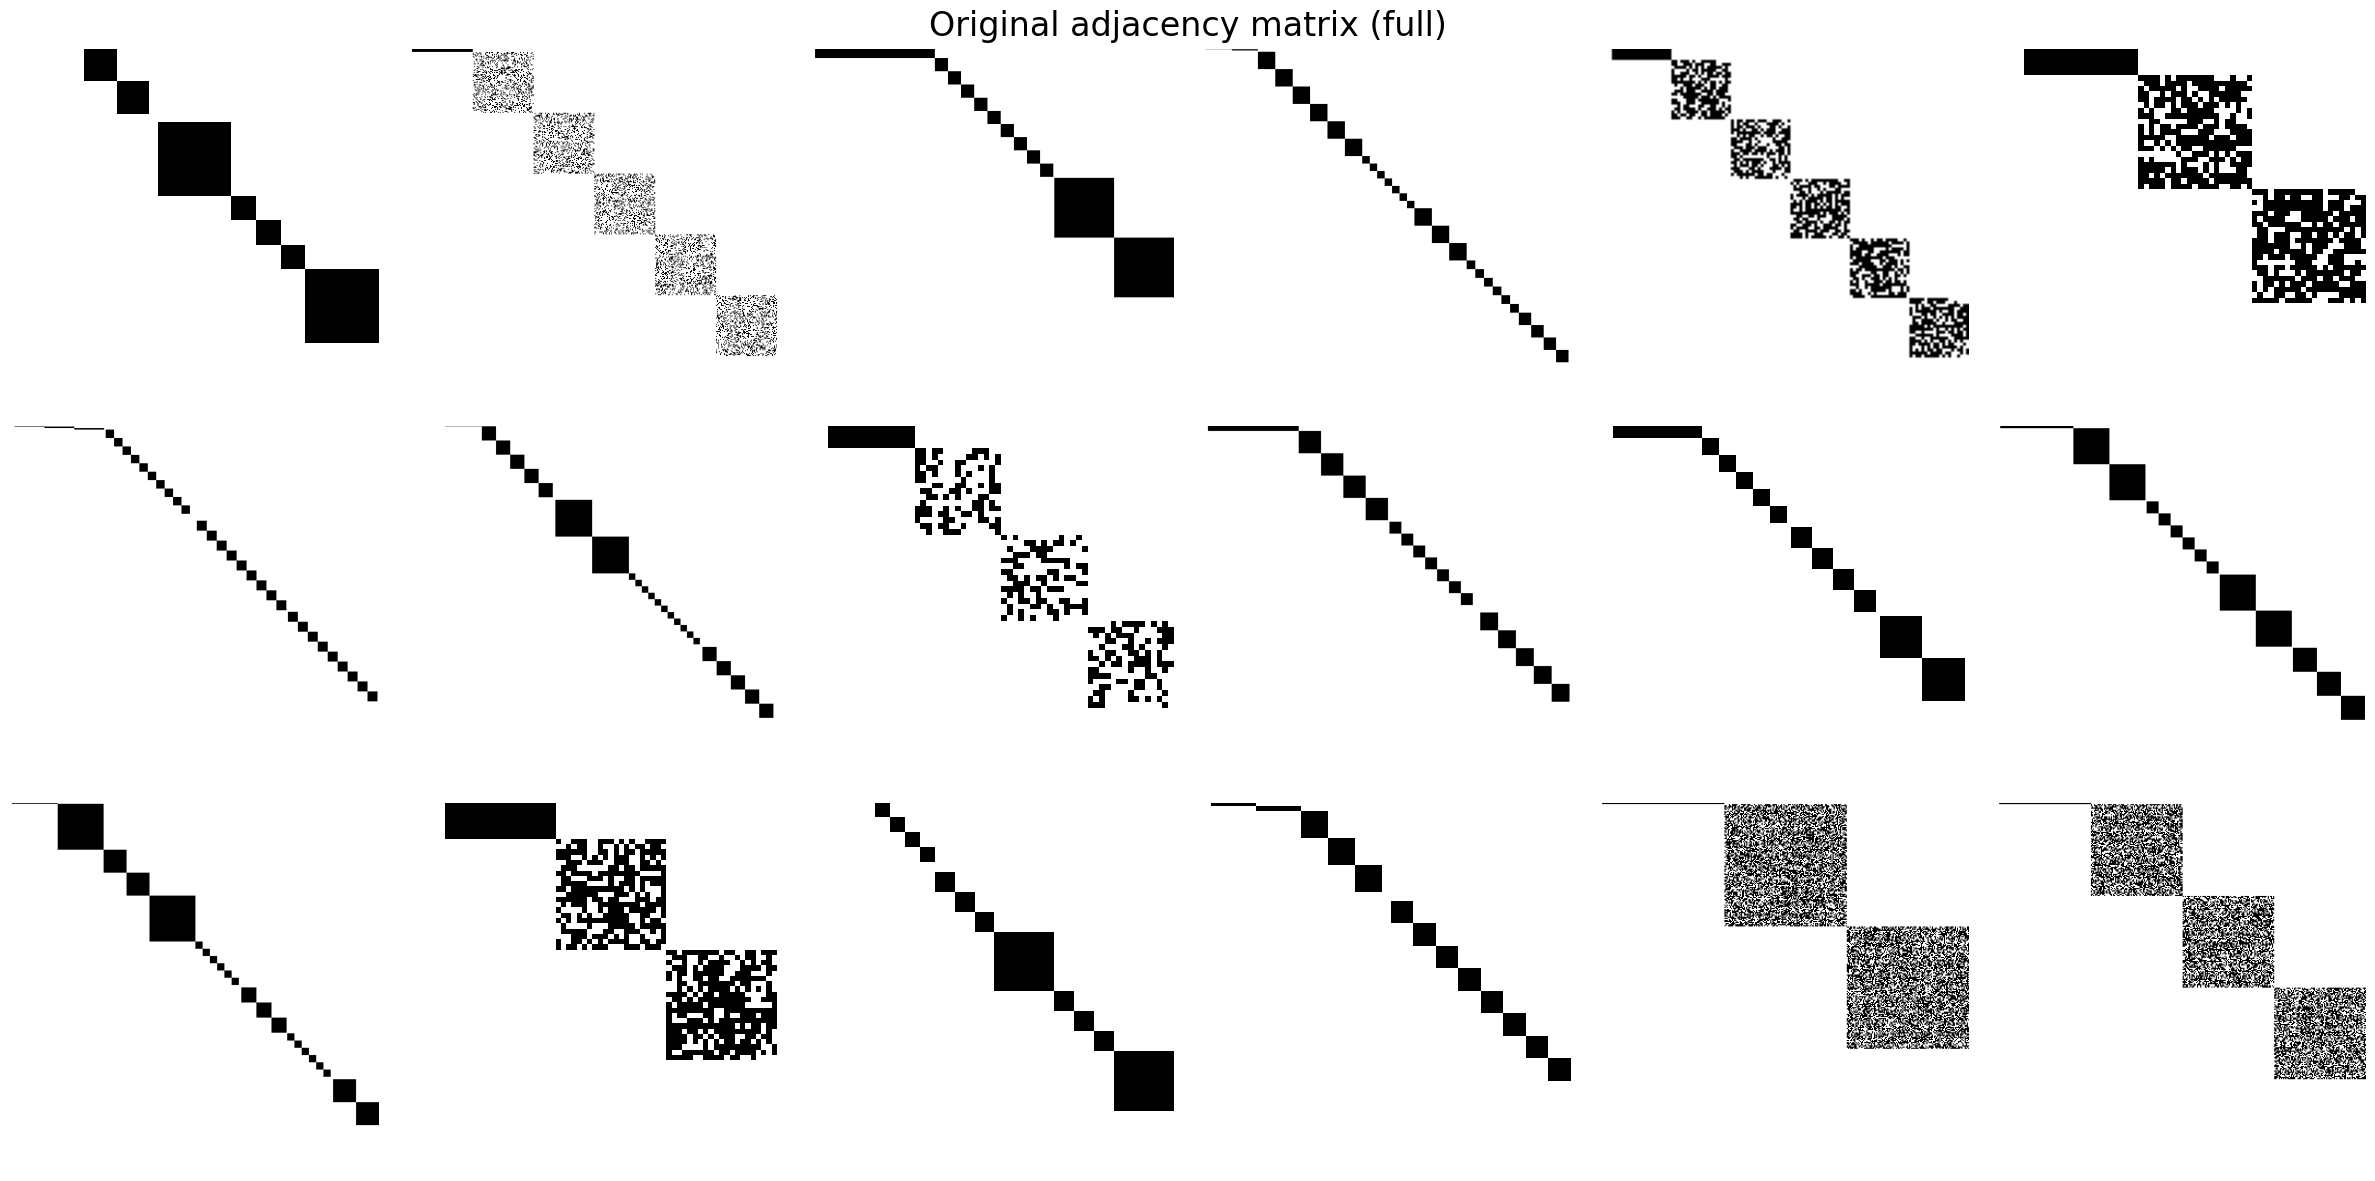

In [11]:
draw_scms(
    graphs, 
    suptitle='Original graph',
    edge_alpha = 1.,
    n_rows = 3,
)
imshow(
    adjs, 
    cmap = ListedColormap(['white', 'black']), 
    suptitle='Original adjacency matrix (full)',
    n_rows = 3,
)

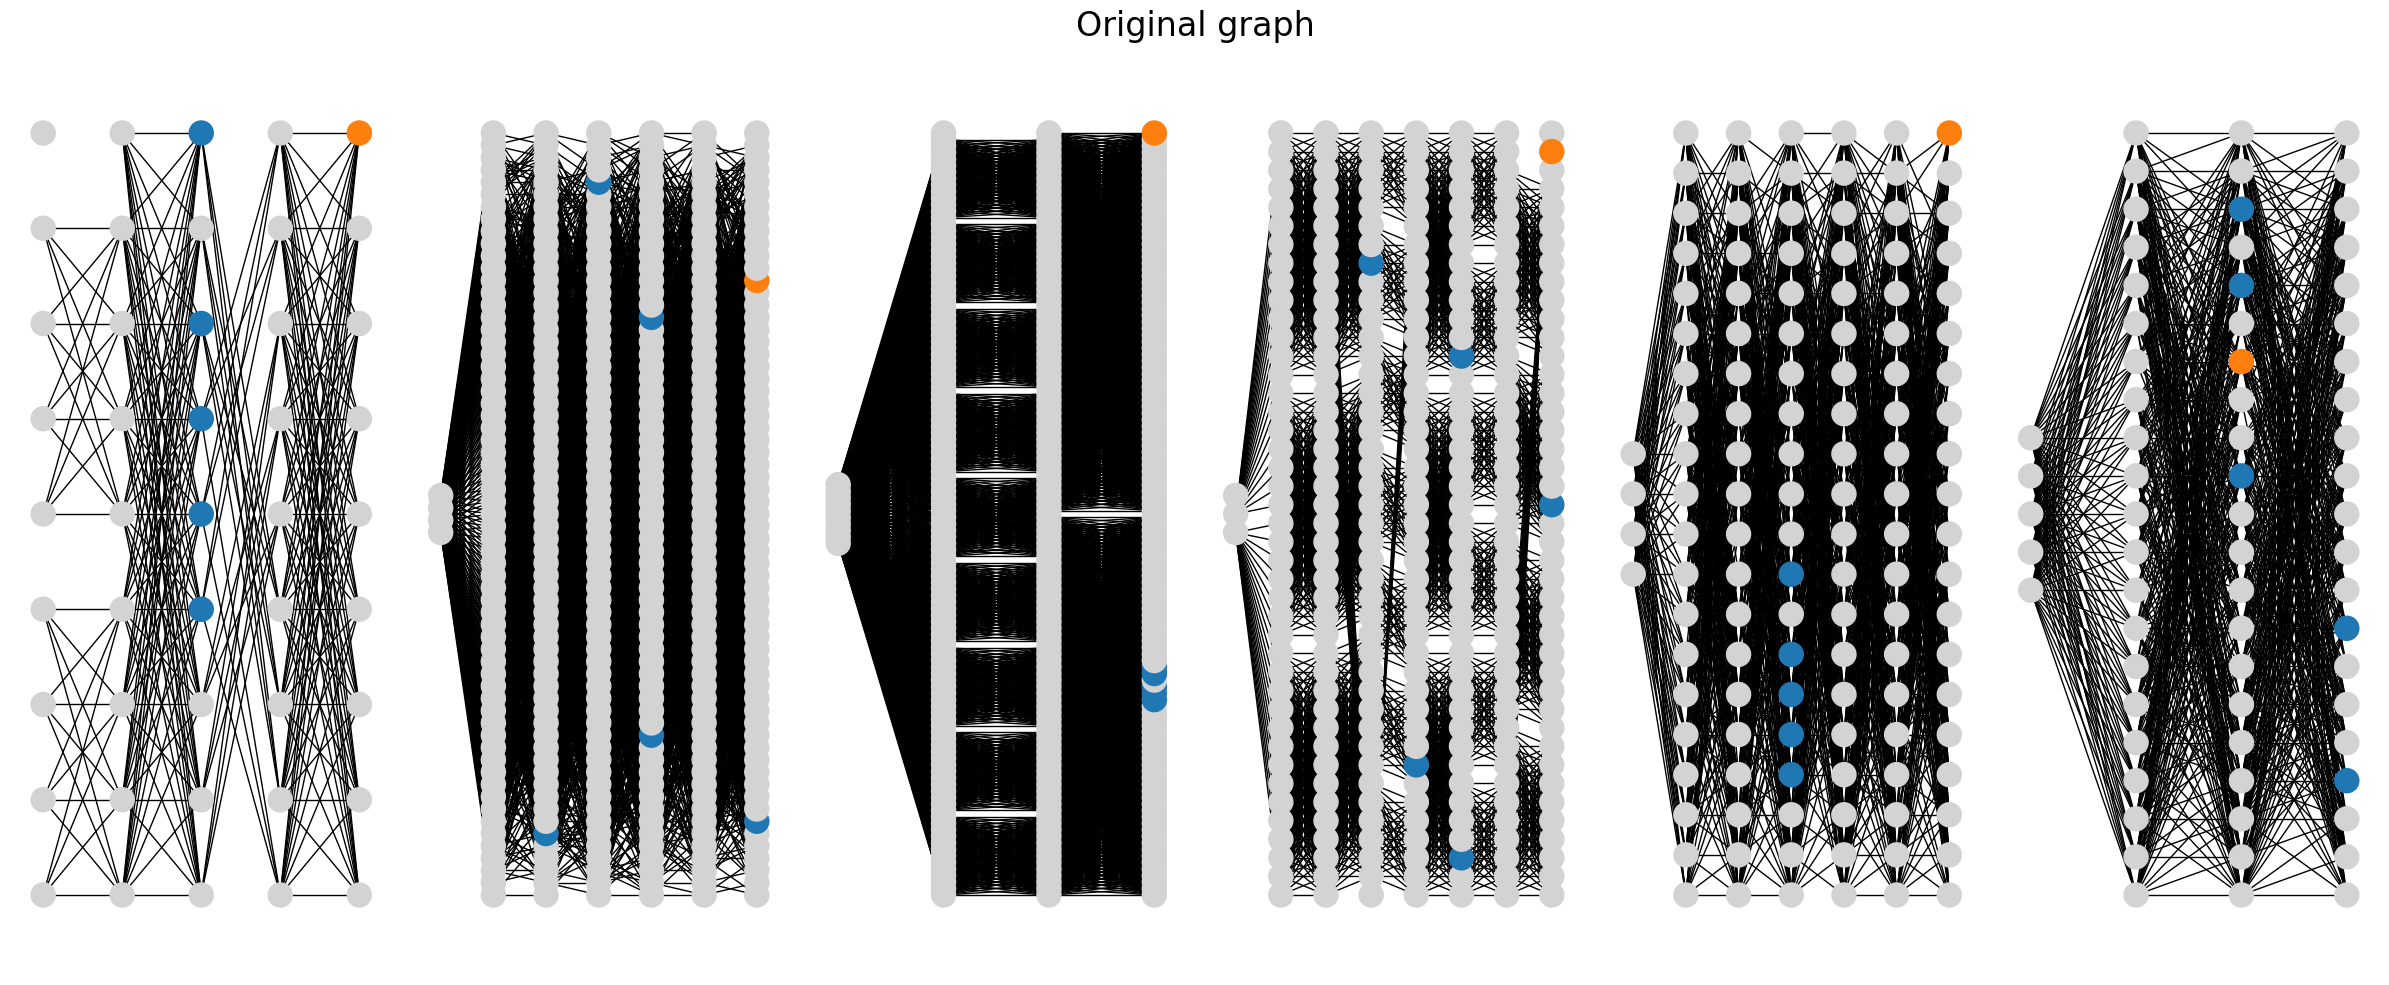

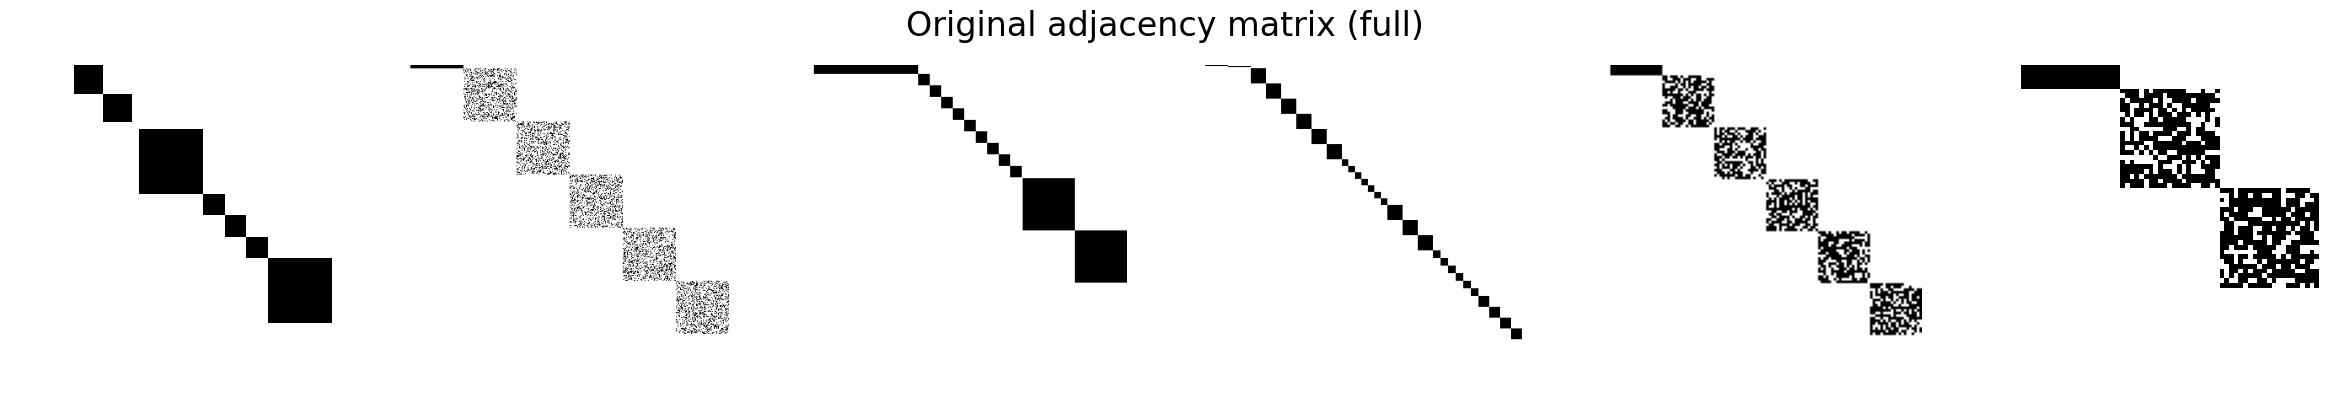

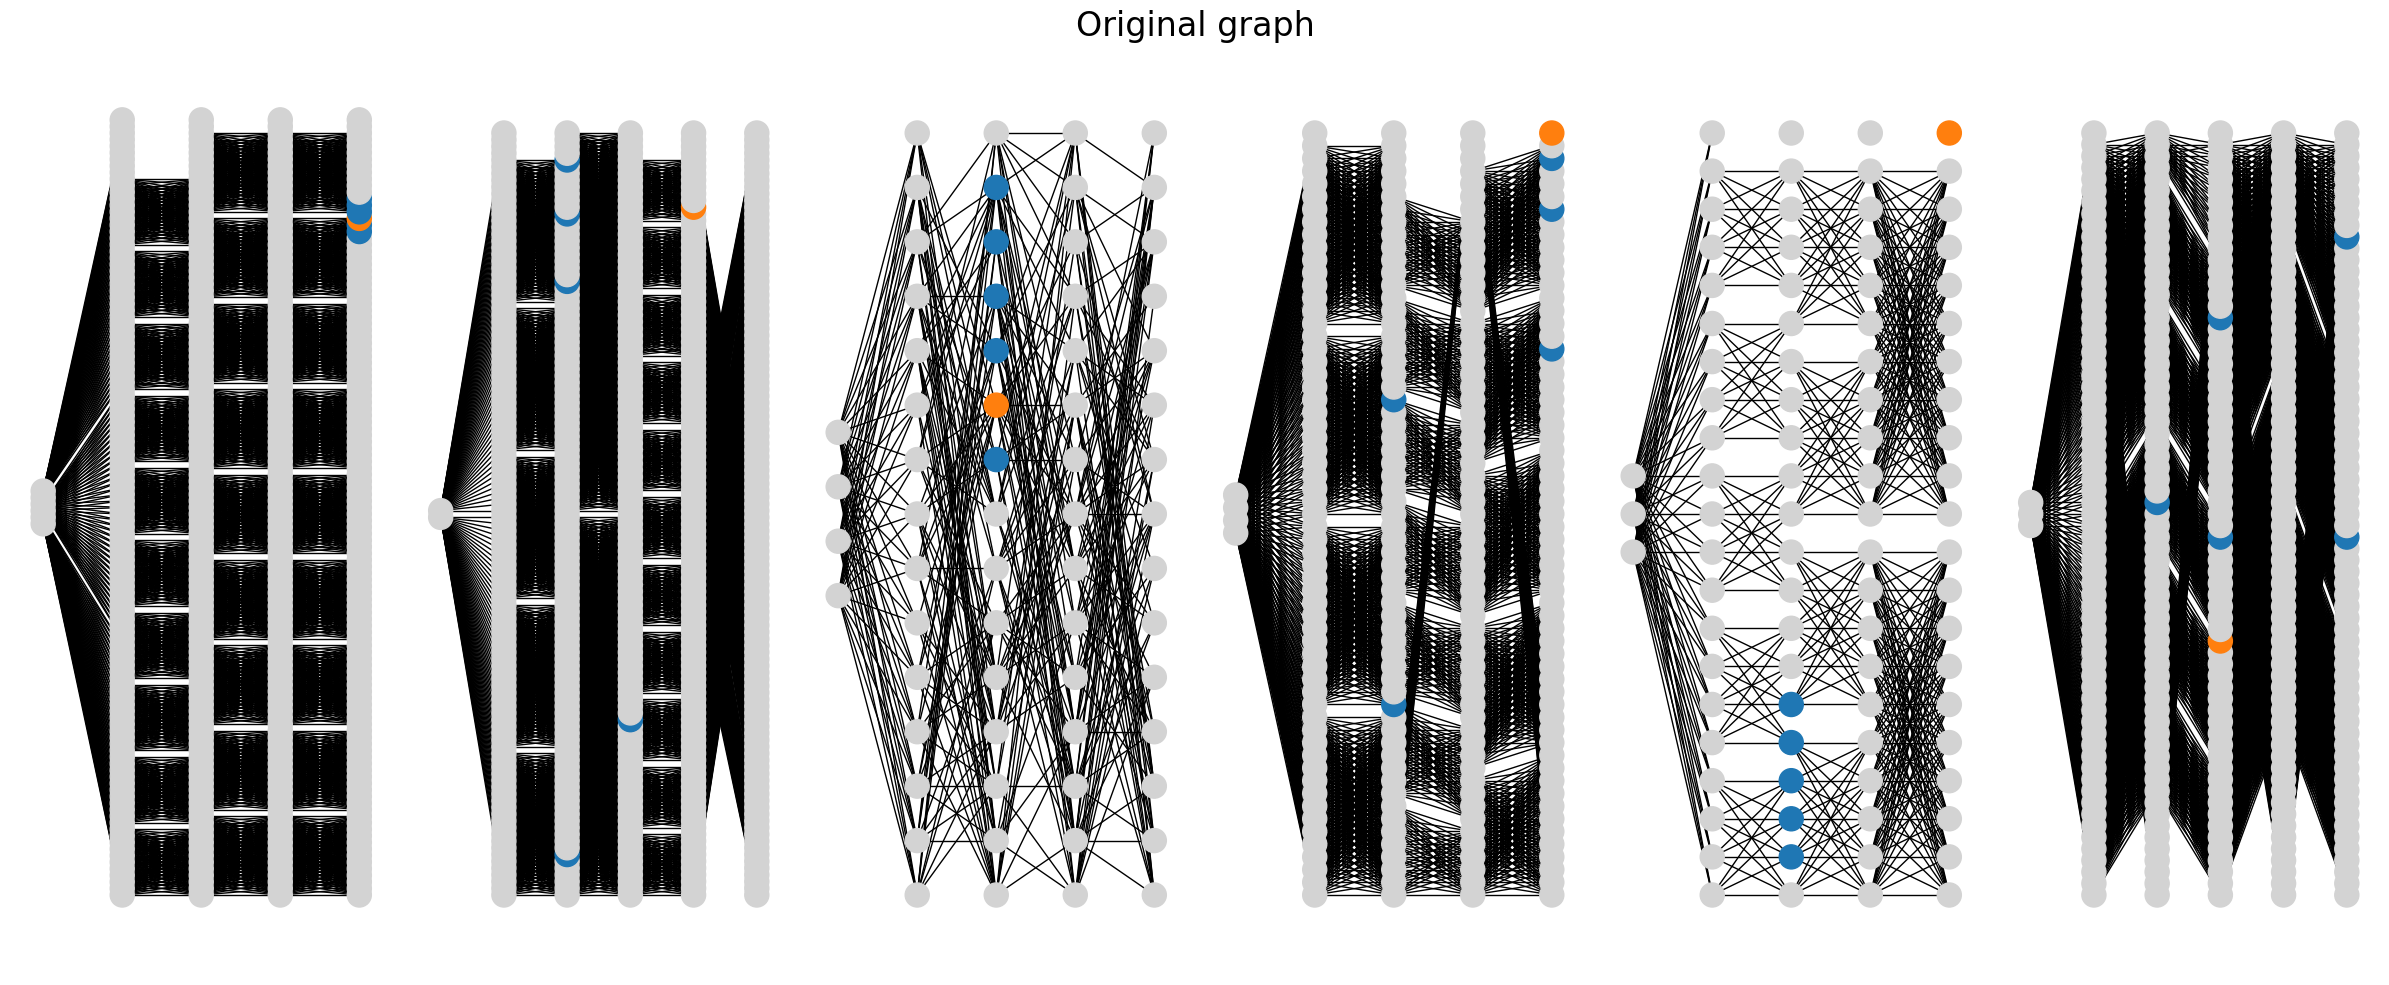

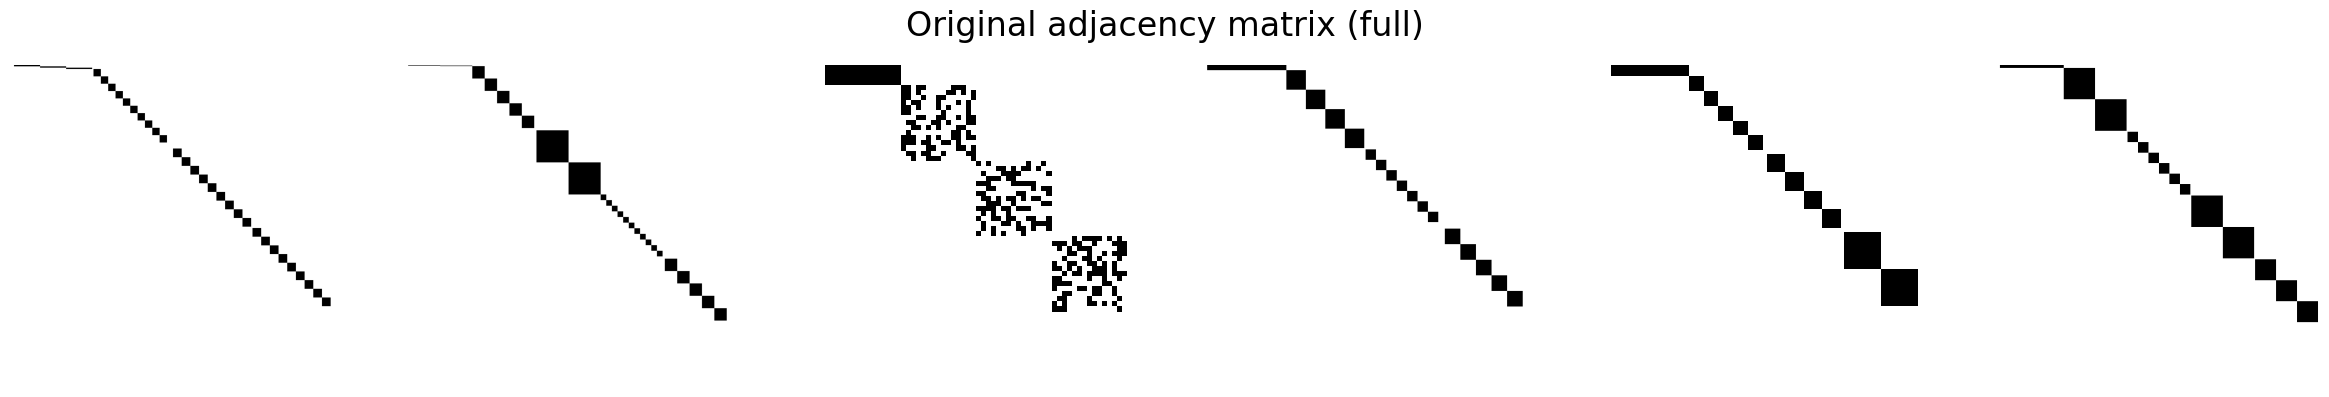

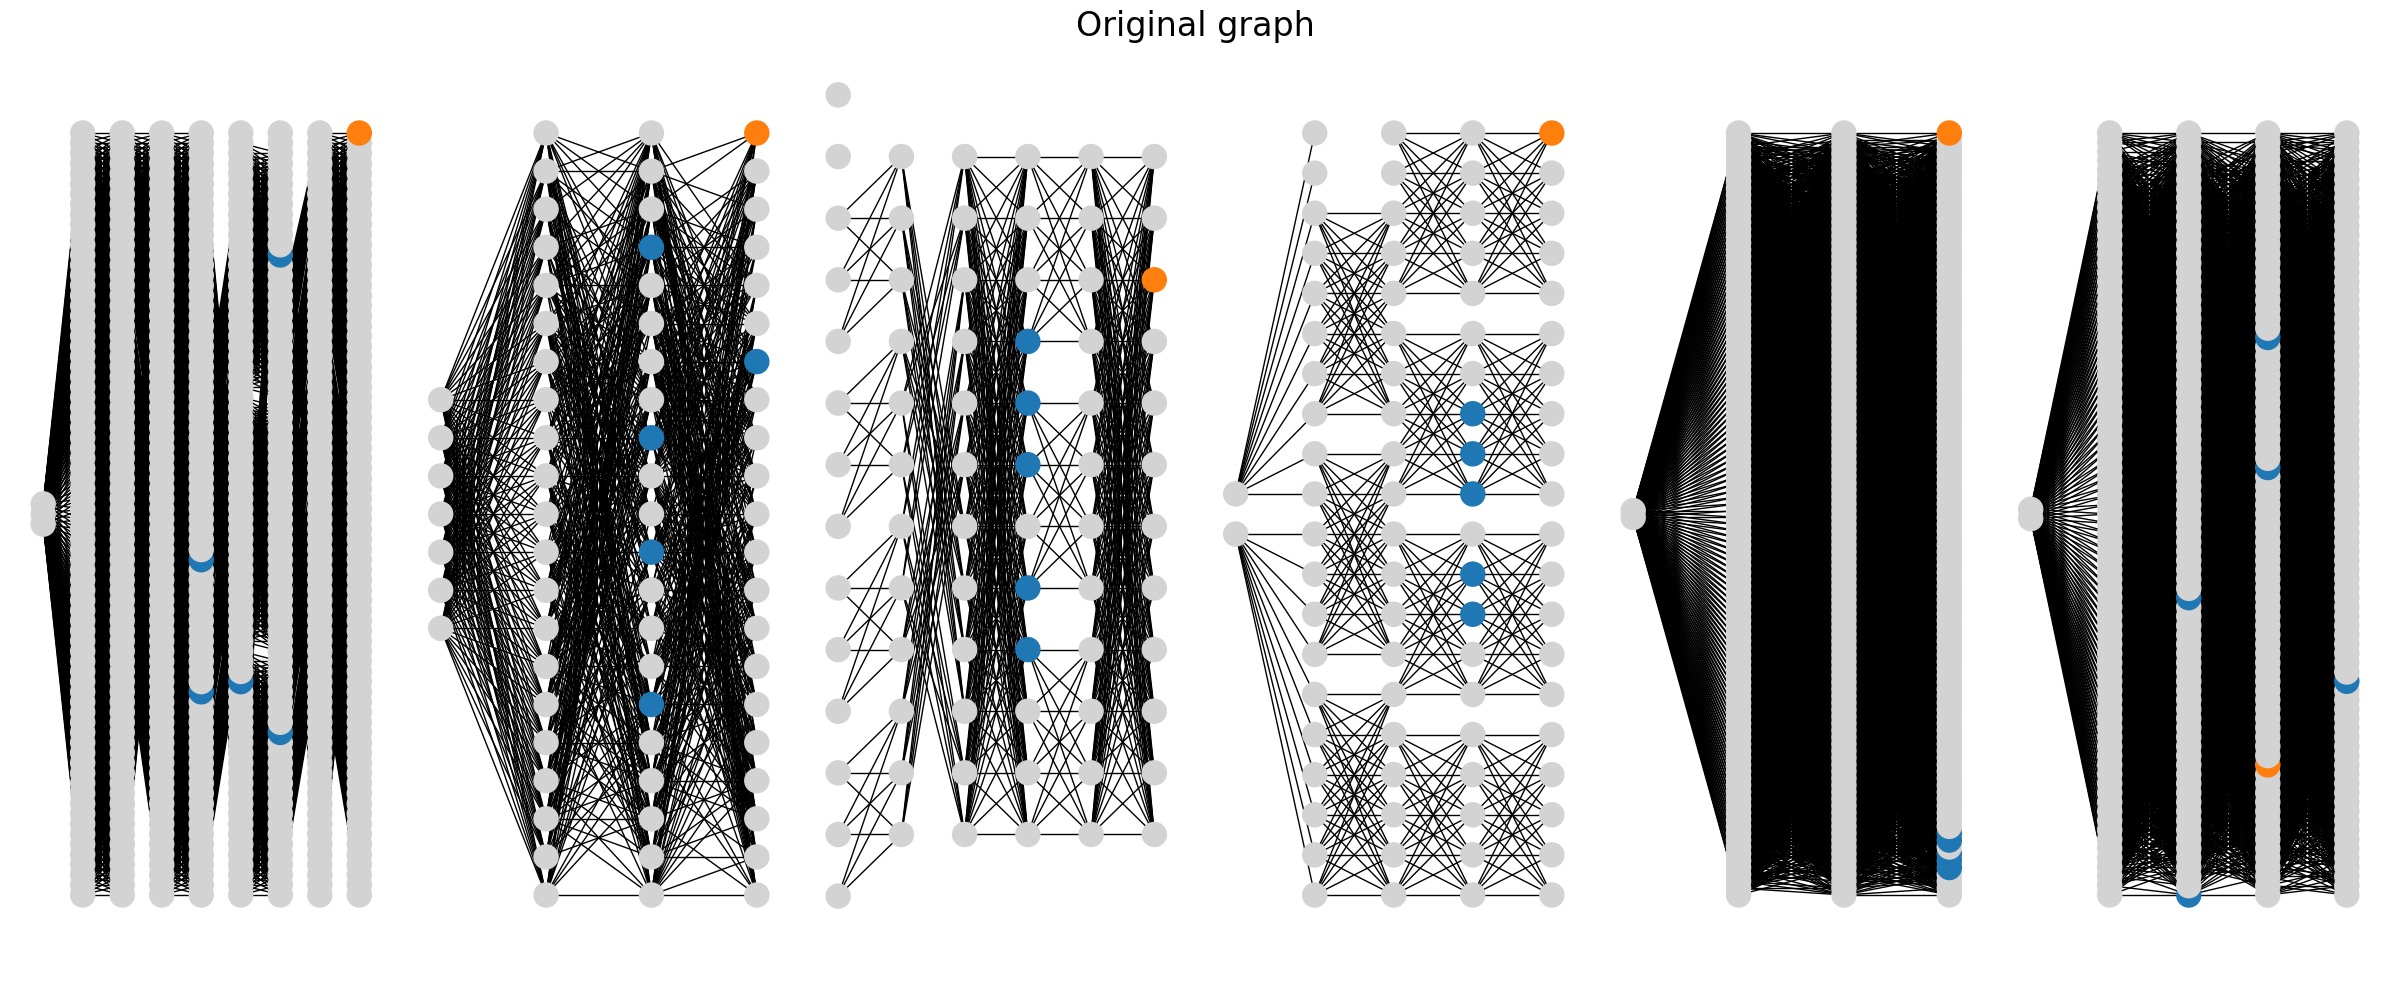

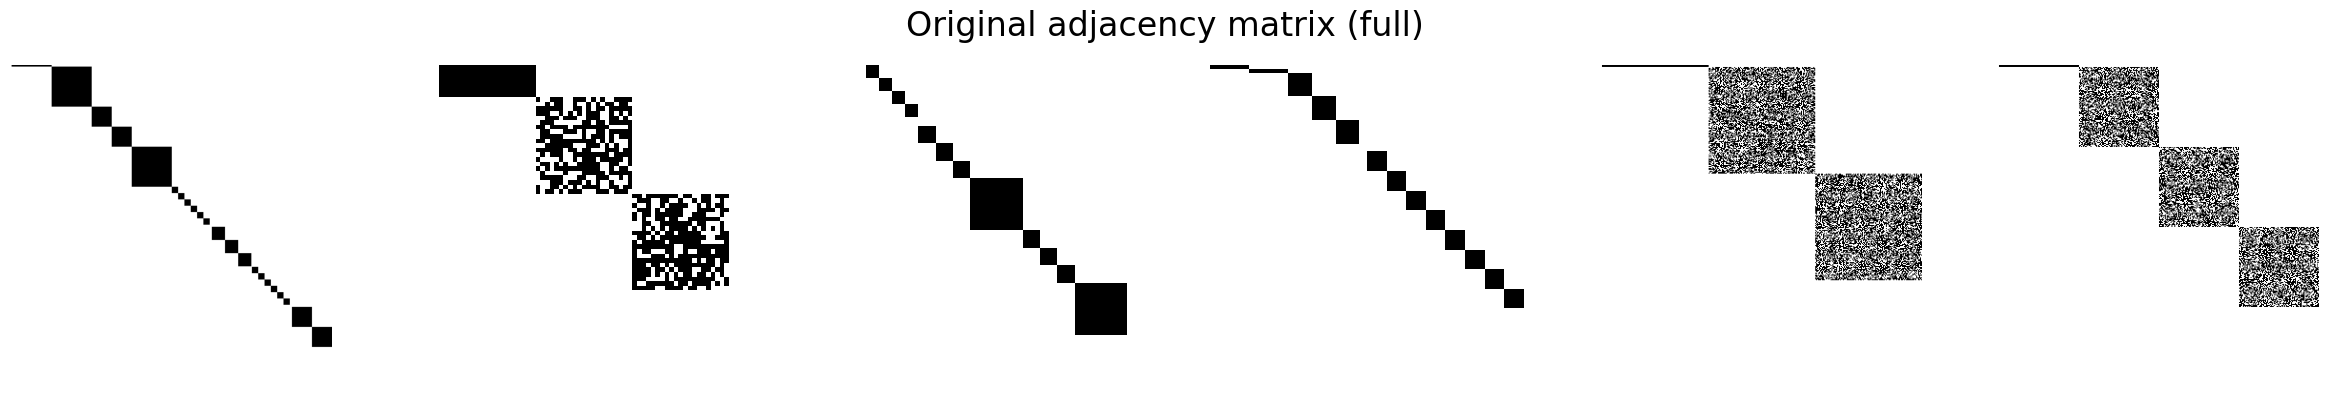

In [ ]:
n_cols = 6
cmap = ListedColormap(['white', 'black'])

for j, i in enumerate(range(0, len(adjs), n_cols)):
    idx_slice = slice(i, i+n_cols)

    draw_scms(graphs[idx_slice], suptitle='Original graph',
        edge_alpha = 1.,
    )
    imshow(adjs[idx_slice], cmap = cmap, suptitle='Original adjacency matrix (full)')

    # draw_scms(graphs_marg[idx_slice], suptitle='Marginalized graph (only included nodes)',
    #     edge_alpha = 1.,
    #     nodelists = nodelists[idx_slice],
    # )
    # imshow(adjs_marg[idx_slice], cmap = cmap, suptitle='Marginalized adjacency matrix (full)')
    # adj_marg_sel = [adj_marg[np.ix_(nodelist, nodelist)] for adj_marg, nodelist in zip(adjs_marg[idx_slice], nodelists[idx_slice])]
    # imshow(adj_marg_sel, cmap = cmap, turn_off_axis='only_border', suptitle='Marginalized adjacency matrix (only included nodes)')

    print('\n\n\n\n')
